# Implementasi Model Klasifikasi untuk Prediksi Tingkat Keparahan Penyakit Jantung Berdasarkan Data Medis 
## Pendahuluan  
Penyakit jantung merupakan salah satu penyebab utama kematian di dunia. Menurut data dari World Health Organization (WHO), penyakit jantung menjadi penyebab kematian nomor satu secara global. Kondisi ini dapat menyerang siapa saja tanpa memandang usia, jenis kelamin, maupun latar belakang sosial, terutama jika terdapat faktor risiko seperti tekanan darah tinggi, kolesterol tinggi, kebiasaan merokok, serta gaya hidup tidak sehat.

Pentingnya deteksi dini penyakit jantung mendorong para peneliti dan praktisi kesehatan untuk mengembangkan sistem yang mampu memprediksi risiko seseorang terkena penyakit jantung sebelum gejala serius muncul. Dalam konteks ini, pemanfaatan teknologi komputasi, khususnya machine learning, menjadi salah satu solusi yang menjanjikan untuk meningkatkan akurasi dan efisiensi dalam proses diagnosis awal.

Salah satu dataset yang sering digunakan dalam penelitian terkait prediksi penyakit jantung adalah Heart Disease Dataset dari UCI Machine Learning Repository. Dataset ini berisi data klinis dari pasien, seperti usia, tekanan darah, kolesterol, kadar gula darah, serta hasil pemeriksaan jantung lainnya. Dengan menggunakan algoritma machine learning, informasi tersebut dapat dianalisis untuk membangun model prediktif yang mampu mengklasifikasikan apakah seorang pasien berisiko terkena penyakit jantung atau tidak.

Penelitian ini bertujuan untuk membangun model prediksi penyakit jantung berbasis data menggunakan pendekatan machine learning, sehingga dapat digunakan sebagai alat bantu dalam mendeteksi penyakit jantung secara lebih dini dan akurat.


## Data Understanding  
### Sumber Data  
Dataset pertama kali di publikasikan oleh :  
Detrano, R. (Cleveland Clinic Foundation). "Heart Disease Dataset." UCI Machine Learning Repository.  
https://archive.ics.uci.edu/dataset/45/heart+disease  

Dataset heart disease tersebut tersedia di UCI Machine Learning Repository yang telah dikumpulkan dari 4 pusat medis yaitu Cleveland Clinic Foundation, Hungarian Institute of Cardiology, Budapest, University Hospital, Zurich, Switzerland, V.A. Medical Center, Long Beach and Cleveland, Ohio.  

### Tujuan  
Dataset ini digunakan untuk membangun model klasifikasi yang memprediksi ada atau tidaknya penyakit jantung pada pasien, guna mendukung penelitian dan diagnosis medis.

### Integrasi Data  
Untuk mengolah data dari UCI Dataset, maka perlu menginstal pustaka (package) yang diperlukan. Instalasi ini bertujuan agar data yang tersedia di UCI dapat diunduh secara langsung ke dalam lingkungan Python untuk dianalisis lebih lanjut.

Langkah pengambilan data dapat dilakukan dengan mengikuti instruksi yang muncul setelah menekan tombol "Import in Python" pada halaman dataset yang dipilih. Perintah tersebut akan memberikan kode Python yang siap digunakan untuk mengunduh dan memuat dataset secara otomatis.

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [24]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Ambil dataset Heart Disease dari UCI
heart_disease = fetch_ucirepo(id=45)

# Ambil fitur dan target sebagai DataFrame
X = heart_disease.data.features
y = heart_disease.data.targets

# Gabungkan fitur dan target
df = pd.concat([X, y], axis=1)

# Simpan ke file Excel
df.to_excel("2heart_disease_uciml.xlsx", index=False)
print("Data berhasil disimpan ke '2heart_disease_uciml.xlsx'")

Data berhasil disimpan ke '2heart_disease_uciml.xlsx'


In [28]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      1

### Eksplorasi Data

#### Struktur Dataset  


In [29]:
import pandas as pd

# Membaca file Excel
data = pd.read_excel("2heart_disease_uciml.xlsx")

# Menampilkan jumlah baris dan kolom
print("Jumlah baris :", data.shape[0])
print("Jumlah kolom:", data.shape[1])

# (Opsional) Menampilkan 5 data pertama
print("\nContoh data:")
print(data.head())


Jumlah baris : 303
Jumlah kolom: 14

Contoh data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


### Fitur pada Dataset Heart Disease (UCI)

**Fitur dan Penjelasannya:**

- **`age`** : Umur pasien (tahun)  
- **`sex`** : Jenis kelamin (0 = perempuan, 1 = laki-laki)  
- **`cp`** : Tipe nyeri dada:  
  - 0 = typical angina  
  - 1 = atypical angina  
  - 2 = non-anginal pain  
  - 3 = asymptomatic  
- **`trestbps`** : Tekanan darah saat istirahat (mm Hg)  
- **`chol`** : Kolesterol serum (mg/dl)  
- **`fbs`** : Gula darah puasa > 120 mg/dl (1 = ya, 0 = tidak)  
- **`restecg`** : Hasil elektrokardiografi saat istirahat  
  - 0 = normal  
  - 1 = ST-T abnormal  
  - 2 = left ventricular hypertrophy  
- **`thalach`** : Denyut jantung maksimum  
- **`exang`** : Angina akibat olahraga (1 = ya, 0 = tidak)  
- **`oldpeak`** : Depresi ST akibat olahraga dibanding istirahat  
- **`slope`** : Kemiringan segmen ST saat latihan  
  - 0 = downsloping  
  - 1 = flat  
  - 2 = upsloping  
- **`ca`** : Jumlah pembuluh darah utama yang diberi pewarna (0–3)  
- **`thal`** : Hasil tes thalassemia  
  - 1 = fixed defect  
  - 2 = normal  
  - 3 = reversible defect  

---

**Target (`num`)**:
- `0` : Tidak ada penyakit jantung  
- `1` – `4` : Ada penyakit jantung (bertingkat keparahan)  



#### Duplikat Data  
* Tidak ada data duplikat pada dataset

In [9]:
import pandas as pd

# Baca file Excel
df = pd.read_excel("2heart_disease_uciml.xlsx")

# Cek apakah ada baris duplikat
duplicates = df[df.duplicated()]
print(f"Jumlah baris duplikat: {len(duplicates)}")

# Tampilkan baris yang duplikat (jika ada)
print(duplicates)


Jumlah baris duplikat: 0
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num]
Index: []


#### Missing Value  
* Terdapat missing value pada atribut ca berjumlah 4 dan atribut thal berjumlah 2 

In [ ]:
# 1. Cek jumlah missing value di setiap kolom
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

Jumlah missing value per kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


### Preprocessing

#### Menghapus Missing Value  
* Menghapus missing value sebanyak 6 dari atribut ca dan thal sehingga menjadi 297 data

In [12]:
# 2. Hapus baris yang mengandung missing value
df_clean = df.dropna()

# 3. Tampilkan jumlah data sebelum dan sesudah
print(f"\nJumlah baris sebelum dihapus: {len(df)}")
print(f"Jumlah baris setelah dihapus: {len(df_clean)}")


Jumlah baris sebelum dihapus: 303
Jumlah baris setelah dihapus: 297


#### Menentukan Outlier dengan LOF  
* mendeteksi outlier pada dataset jika hasil perhitungan dengan library LOF = -1

In [6]:
from sklearn.neighbors import LocalOutlierFactor

# Deteksi outlier dengan KNN menggunakan LocalOutlierFactor
# Pilih hanya kolom numerik
numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])

# Inisialisasi dan jalankan model LOF
lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(numeric_df)

# Tambahkan hasil prediksi ke df_clean
df_clean['outlier'] = y_pred

# 5. Tampilkan data yang dianggap outlier
outliers = df_clean[df_clean['outlier'] == -1]
print(f"\nJumlah outlier yang terdeteksi: {len(outliers)}")
print(outliers)


Jumlah outlier yang terdeteksi: 10
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
48    65    0   3       140   417    1        2      157      0      0.8   
93    44    0   3       108   141    0        0      175      0      0.6   
121   63    0   4       150   407    0        2      154      0      4.0   
152   67    0   3       115   564    0        2      160      0      1.6   
173   62    0   4       140   394    0        2      157      0      1.2   
181   56    0   4       134   409    0        2      150      1      1.9   
188   54    1   2       192   283    0        2      195      0      0.0   
202   57    1   3       150   126    1        0      173      0      0.2   
245   67    1   4       120   237    0        0       71      0      1.0   
296   59    1   4       164   176    1        2       90      0      1.0   

     slope   ca  thal  num  outlier  
48       1  1.0   3.0    0       -1  
93       2  0.0   3.0    0       -1  
121      2  3

/tmp/ipykernel_29541/1532264532.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['outlier'] = y_pred


#### visualisasi outlier

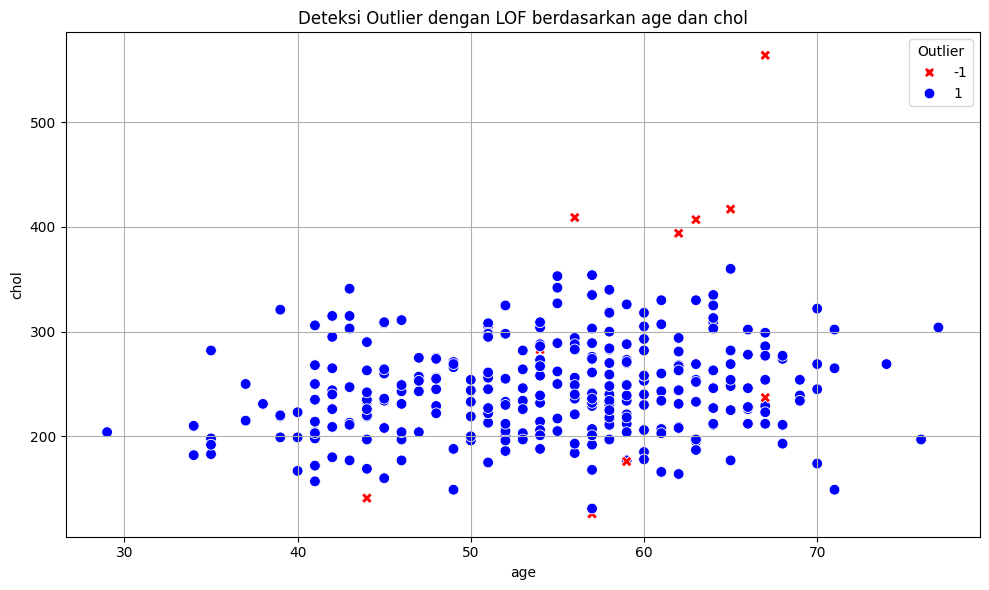

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih dua kolom numerik untuk divisualisasikan
x_feature = 'age'
y_feature = 'chol'

# Plot scatter dengan pewarnaan berdasarkan outlier
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clean,
    x=x_feature,
    y=y_feature,
    hue='outlier',
    palette={1: 'blue', -1: 'red'},
    style='outlier',
    markers={1: 'o', -1: 'X'},
    s=60
)

plt.title(f'Deteksi Outlier dengan LOF berdasarkan {x_feature} dan {y_feature}')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(title='Outlier')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Menghapus Outlier  
* outlier yang ditemukan sebanyak 10 data 

In [ ]:
# Hapus baris yang terdeteksi sebagai outlier (outlier = -1)
df_no_outlier = df_clean[df_clean['outlier'] == 1].drop(columns='outlier')

# Tampilkan hasil
print(f"Jumlah data setelah outlier dihapus: {len(df_no_outlier)}")
df_no_outlier.to_excel("data_bersih_tanpa_outlier.xlsx", index=False)

Jumlah data setelah outlier dihapus: 287


#### Normalisasi Min Max

In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Baca file Excel
df = pd.read_excel("data_bersih_tanpa_outlier.xlsx")

# Pisahkan fitur dan target (misalnya target adalah kolom 'num')
X = df.drop(columns='num')
y = df['num']

# Normalisasi fitur
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Ubah ke DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Gabungkan kembali dengan target
final_df = pd.concat([X_normalized_df, y.reset_index(drop=True)], axis=1)

# Simpan ke Excel
final_df.to_excel("data_normalized.xlsx", index=False)
print("Data berhasil dinormalisasi dan disimpan ke data_normalized.xlsx")

Data berhasil dinormalisasi dan disimpan ke data_normalized.xlsx


### SMOTE  
* SMOTE (Synthetic Minority Over-sampling Technique) adalah teknik penyeimbangan data (balancing) yang digunakan ketika memiliki data tidak seimbang (imbalanced dataset), yaitu jumlah data pada satu kelas (biasanya kelas minoritas) jauh lebih sedikit daripada kelas lainnya. SMOTE dilakukan hanya pada data training.



#### Split Data Training dan Testing

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Membaca dataset
data = pd.read_excel('data_normalized.xlsx')

# 2. Memisahkan fitur (X) dan target (y)
X = data[['age','sex','cp', 'trestbps', 'chol', 'fbs', 'restecg',
          'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data['num']

# 3. Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# 4. Menggabungkan X_train dan y_train jadi satu DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# 5. Menyimpan data latih ke Excel
train_data.to_excel("data_latih_before_smote.xlsx", index=False)

# Simpan data uji juga jika ingin
test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_excel("data_uji.xlsx", index=False)

print("Data latih berhasil disimpan ke 'data_latih_before_smote.xlsx'")

Data latih berhasil disimpan ke 'data_latih_before_smote.xlsx'


In [3]:
import pandas as pd

# Membaca data dari file Excel
data = pd.read_excel('data_latih_before_smote.xlsx')

# Hitung jumlah data per kelas
jumlah_per_kelas = data['num'].value_counts().sort_index()

# Tampilkan hasil
print("Jumlah data per kelas:")
print(jumlah_per_kelas)


Jumlah data per kelas:
num
0    127
1     43
2     21
3     30
4      8
Name: count, dtype: int64


* karena jumlah data pada setiap kelas berbeda dan ada kelas minoritas maka diperlukan smote

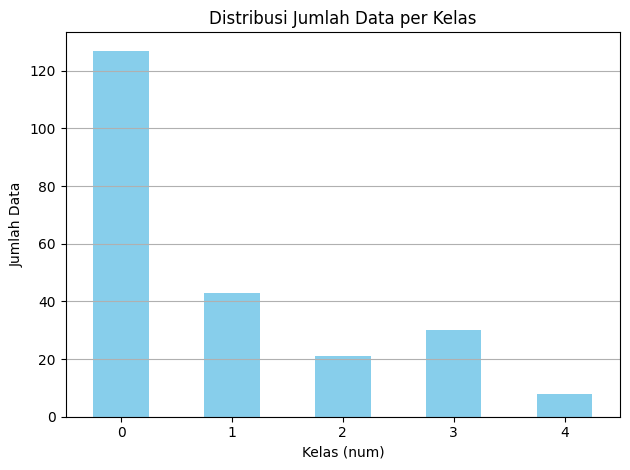

In [4]:
import matplotlib.pyplot as plt

# Visualisasi jumlah data per kelas
jumlah_per_kelas.plot(kind='bar', color='skyblue')
plt.title("Distribusi Jumlah Data per Kelas")
plt.xlabel("Kelas (num)")
plt.ylabel("Jumlah Data")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [5]:
!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [imbalanced-learn][imbalanced-learn]


In [6]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# 1. Membaca data latih dari Excel
train_data = pd.read_excel("data_latih_before_smote.xlsx")

# 2. Pisahkan fitur (X) dan target (y)
X_train = train_data.drop(columns=["num"])
y_train = train_data["num"]

# 3. Terapkan SMOTE
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. Gabungkan kembali hasil SMOTE menjadi DataFrame
smote_train_data = pd.DataFrame(X_train_smote, columns=X_train.columns)
smote_train_data["num"] = y_train_smote

# 5. Simpan ke Excel
smote_train_data.to_excel("data_latih_after_smote.xlsx", index=False)

print("Data latih hasil SMOTE berhasil disimpan ke 'data_latih_after_smote.xlsx'")


Data latih hasil SMOTE berhasil disimpan ke 'data_latih_after_smote.xlsx'


In [7]:
import pandas as pd

# Membaca file hasil SMOTE
data_smote = pd.read_excel('data_latih_after_smote.xlsx')

# Hitung jumlah data per kelas
jumlah_per_kelas_smote = data_smote['num'].value_counts().sort_index()

# Tampilkan hasil
print("Jumlah data per kelas setelah SMOTE:")
print(jumlah_per_kelas_smote)


Jumlah data per kelas setelah SMOTE:
num
0    127
1    127
2    127
3    127
4    127
Name: count, dtype: int64


### Modelling klasifikasi Gaussian Naive Bayes

In [17]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Baca data latih hasil SMOTE
train_data_smote = pd.read_excel("data_latih_after_smote.xlsx")
X_train = train_data_smote.drop(columns=["num"])
y_train = train_data_smote["num"]

# 2. Baca data uji (asli)
test_data = pd.read_excel("data_uji.xlsx")
X_test = test_data.drop(columns=["num"])
y_test = test_data["num"]

# 3. Buat dan latih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# 4. Prediksi
y_pred = model.predict(X_test)

# 5. Evaluasi model
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, average='macro', zero_division=0))
print("F1 Score :", f1_score(y_test, y_pred, average='macro', zero_division=0))


Accuracy : 0.4482758620689655
Precision: 0.23552380952380952
Recall   : 0.2671428571428571
F1 Score : 0.2410377358490566


#### Uji model dengan data inputan baru

In [18]:
# Contoh inputan baru (sudah dinormalisasi)
data_baru = pd.DataFrame([{
    'age': 63,
    'sex': 1,
    'cp': 1,
    'trestbps': 145,
    'chol': 233,
    'fbs': 1,
    'restecg': 2,
    'thalach': 150,
    'exang': 0,
    'oldpeak': 2.3,
    'slope': 3,
    'ca': 0,
    'thal': 6
}])
# Prediksi
hasil_prediksi = model.predict(data_baru)

# Tampilkan hasil
print("Prediksi kelas untuk data baru:", hasil_prediksi[0])


Prediksi kelas untuk data baru: 3


## Modelling Klasifikasi Decision Tree

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Baca data latih hasil SMOTE
train_data = pd.read_excel("data_latih_after_smote.xlsx")
X_train = train_data.drop(columns=["num"])
y_train = train_data["num"]

# 2. Baca data uji asli
test_data = pd.read_excel("data_uji.xlsx")
X_test = test_data.drop(columns=["num"])
y_test = test_data["num"]

# 3. Buat dan latih model Random Forest
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,             # batasi kedalaman untuk mencegah overfitting
    random_state=0
)
model.fit(X_train, y_train)

# 4. Prediksi
y_pred = model.predict(X_test)

# 5. Evaluasi
print("=== Evaluasi Random Forest ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, average='macro', zero_division=0))
print("F1 Score :", f1_score(y_test, y_pred, average='macro', zero_division=0))

# 6. Laporan detail
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))


=== Evaluasi Random Forest ===
Accuracy : 0.5
Precision: 0.24938416422287388
Recall   : 0.26476190476190475
F1 Score : 0.2562183579132732

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        28
           1       0.27      0.30      0.29        10
           2       0.20      0.17      0.18        12
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         4

    accuracy                           0.50        58
   macro avg       0.25      0.26      0.26        58
weighted avg       0.46      0.50      0.48        58



#### Uji model dengan data inputan baru

In [22]:
# Contoh inputan baru (sudah dinormalisasi)
data_baru = pd.DataFrame([{
    'age': 63,
    'sex': 1,
    'cp': 1,
    'trestbps': 145,
    'chol': 233,
    'fbs': 1,
    'restecg': 2,
    'thalach': 150,
    'exang': 0,
    'oldpeak': 2.3,
    'slope': 3,
    'ca': 0,
    'thal': 6
}])
# Prediksi
hasil_prediksi = model.predict(data_baru)

# Tampilkan hasil
print("Prediksi kelas untuk data baru:", hasil_prediksi[0])


Prediksi kelas untuk data baru: 3


### Evaluasi model

$
\begin{array}{lcccc}
\hline
\textbf{Model} & \textbf{Akurasi} \\
\hline
\text{Naive Bayes + SMOTE}& 0.44 \\
\text{Random Forest + SMOTE} & 0.5 \\
\hline
\end{array}
$  

* Random Forest lebih baik dari Naive Bayes dalam dataset ini.  
* Tapi keduanya belum ideal, karena akurasi < 60%.  
